# Batch mode training using least squares- supervised learning of network weights

In [50]:
import numpy as np
import matplotlib.pyplot as plt

class RBFNN:
    def __init__(self, node_number, sigma=1.0):
        self.node_number = node_number
        self.sigma = sigma
        self.node_positions = None
        self.weights = None
        self.kernel_matrix = None
    
    def get_node_positions(self,X):
        self.node_positions = np.linspace(0,2*np.pi,self.node_number)

    def RBF_function(self, x, node_position):
        return np.exp(-np.linalg.norm(x - node_position)**2 / (2 * self.sigma**2))

    
    def get_kernel_matrix(self, X):
        self.get_node_positions(X)
        self.kernel_matrix = np.zeros((len(X),self.node_number))
        for i in range(len(X)):
            self.kernel_matrix[i, :] = np.array([self.RBF_function(X[i], node_position) for node_position in self.node_positions])
        return self.kernel_matrix
    
    def fit(self,X,Y):
        self.get_kernel_matrix(X)
        self.weights, residuals, _, _ = np.linalg.lstsq(self.kernel_matrix, Y, rcond=None)

    def predict(self, X_test):
        kernel_test = self.get_kernel_matrix(X_test)
        return  np.dot(kernel_test,self.weights)

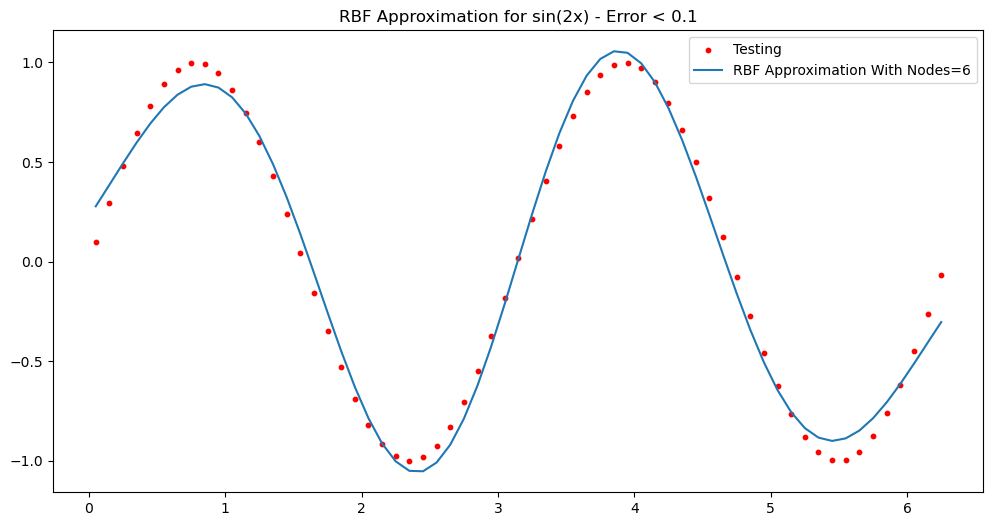

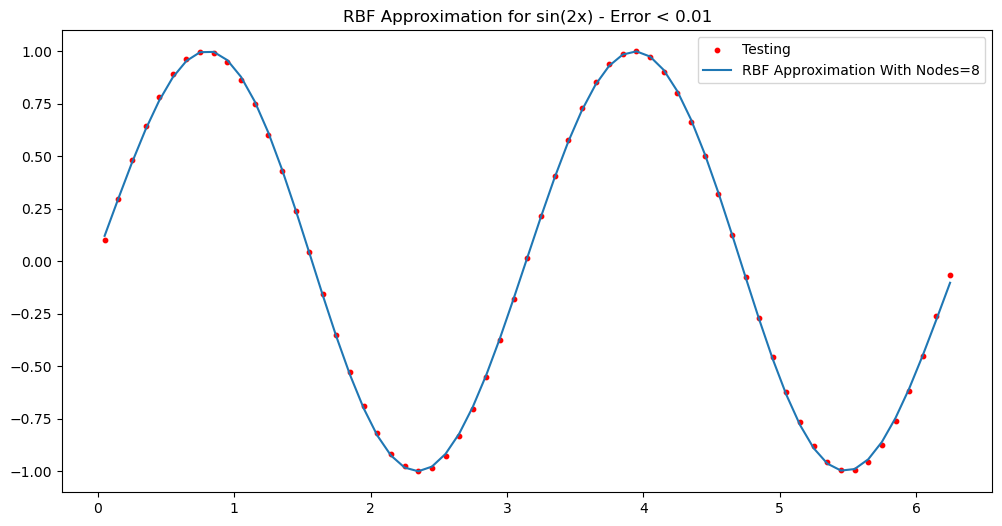

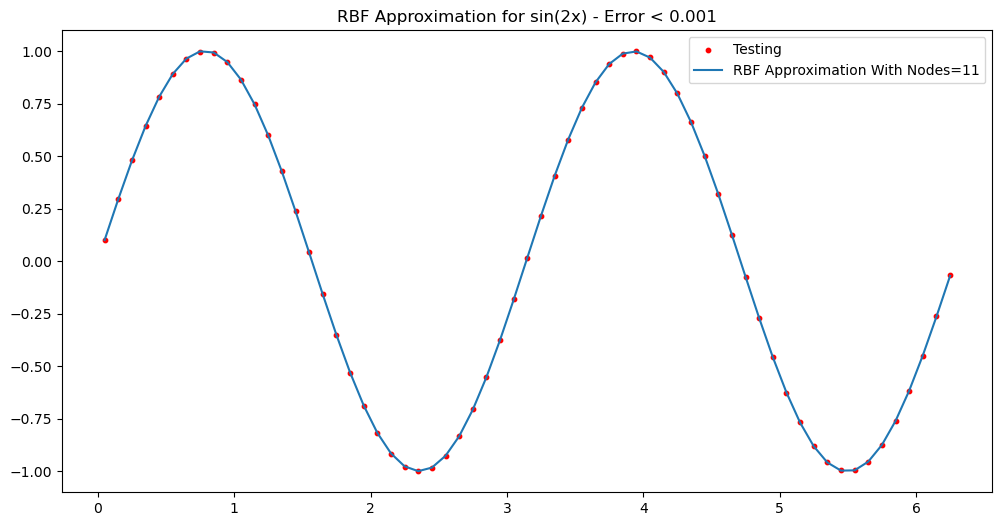

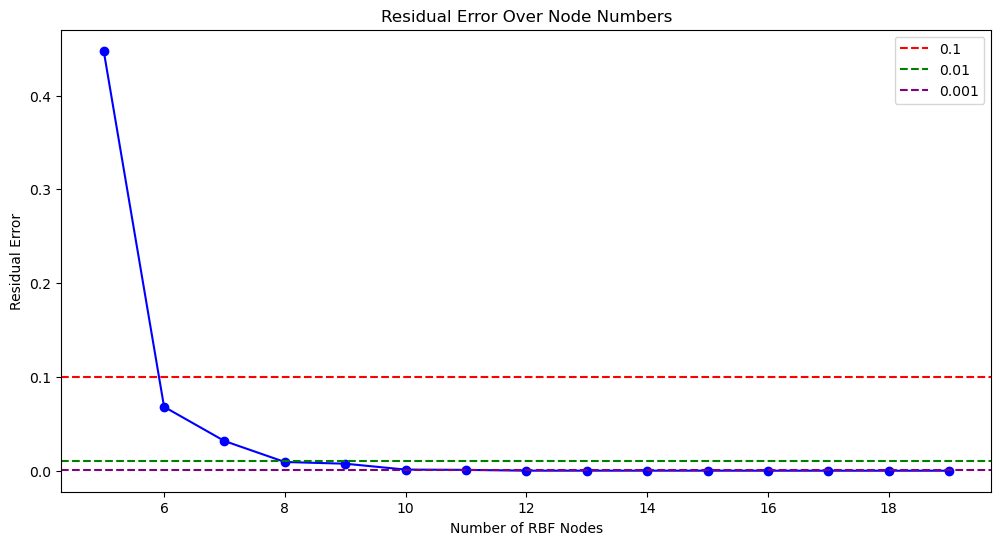

Nodes needed to reach error < 0.1: 6
Nodes needed to reach error < 0.01: 8
Nodes needed to reach error < 0.001: 11


In [78]:

# Parameters
node_number_max =20
sigma = 1
error_thresholds = [0.1, 0.01, 0.001]
thresholds_reached = [False, False, False]
threshold_nodes = [None, None, None]

X_train = np.arange(0, 2*np.pi, 0.1)
sin_Y_train = np.sin(2 * X_train)
X_test = np.arange(0.05, 2 * np.pi, 0.1)
sin_Y_test = np.sin(2 * X_test)

node_counts = []
errors = []

for node_number in range(5, node_number_max):
    sin_rbf = RBFNN(node_number, sigma)
    sin_rbf.fit(X_train, sin_Y_train)
    Y_pred_sin = sin_rbf.predict(X_test)
    residual_error = np.abs(Y_pred_sin - sin_Y_test).mean()
    node_counts.append(node_number)
    errors.append(residual_error)

    for i, threshold in enumerate(error_thresholds):
        if not thresholds_reached[i] and residual_error < threshold:
            thresholds_reached[i] = True
            threshold_nodes[i] = node_number
            plt.figure(figsize=(12, 6))
            plt.scatter(X_test, sin_Y_test, color='red', s=10, label="Testing")
            plt.plot(X_test, Y_pred_sin, label=f"RBF Approximation With Nodes={node_number}")
            plt.title(f"RBF Approximation for sin(2x) - Error < {threshold}")
            plt.legend()
            plt.show()
            break

    # if all(thresholds_reached):
    #     break

plt.figure(figsize=(12, 6))
plt.plot(node_counts, errors, marker='o', linestyle='-', color='b')
plt.xlabel("Number of RBF Nodes")
plt.ylabel("Residual Error")
plt.title("Residual Error Over Node Numbers")
plt.axhline(y=0.1, color='r', linestyle='--', label="0.1")
plt.axhline(y=0.01, color='g', linestyle='--', label="0.01")
plt.axhline(y=0.001, color='purple', linestyle='--', label="0.001")
plt.legend()
plt.show()

# Print the number of nodes needed for each threshold
for i, threshold in enumerate(error_thresholds):
    print(f"Nodes needed to reach error < {threshold}: {threshold_nodes[i]}")


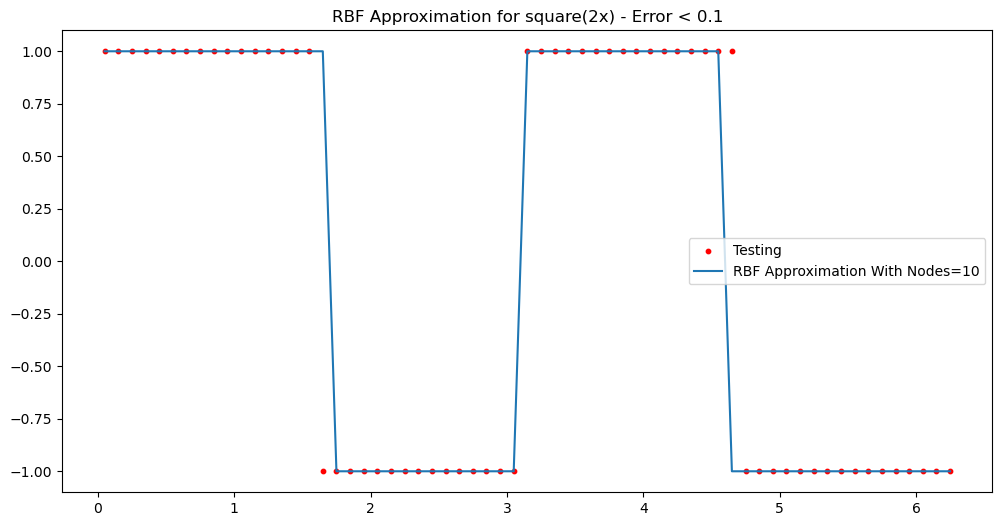

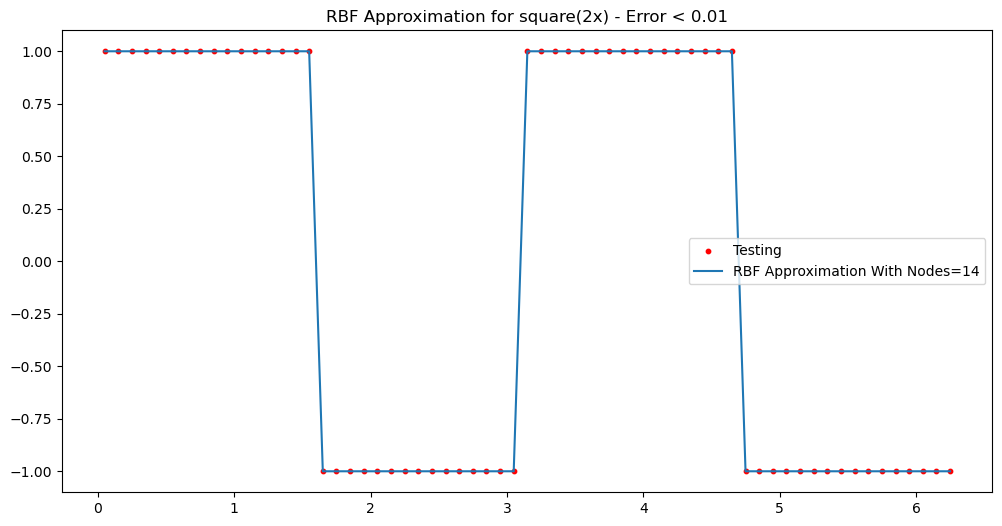

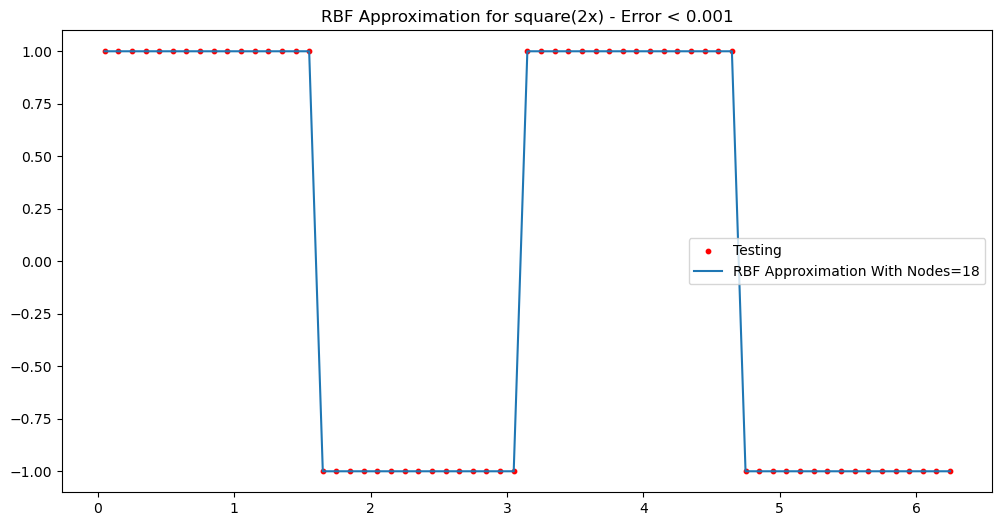

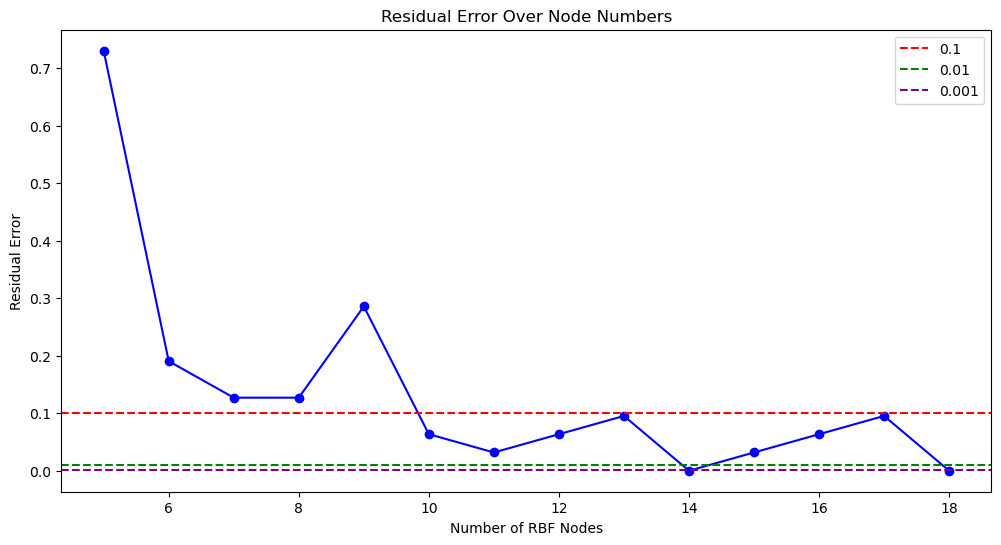

Nodes needed to reach error < 0.1: 10
Nodes needed to reach error < 0.01: 14
Nodes needed to reach error < 0.001: 18


In [76]:

# Parameters
node_number_max = 20
sigma = 0.2
error_thresholds = [0.1, 0.01, 0.001]
thresholds_reached = [False, False, False]
threshold_nodes = [None, None, None]

X_train = np.arange(0, 2*np.pi, 0.1)
square_Y_train = np.where(np.sin(2 * X_train) >= 0, 1, -1)
X_test = np.arange(0.05, 2 * np.pi, 0.1)
square_Y_test = np.where(np.sin(2 * X_test) >= 0, 1, -1)

node_counts = []
errors = []

for node_number in range(5, node_number_max):
    square_rbf = RBFNN(node_number, sigma)
    square_rbf.fit(X_train, square_Y_train)
    Y_pred_square = square_rbf.predict(X_test)
    Y_pred_square = np.where(square_rbf.predict(X_test) >= 0, 1, -1)
    residual_error = np.abs(Y_pred_square - square_Y_test).mean()
    node_counts.append(node_number)
    errors.append(residual_error)

    for i, threshold in enumerate(error_thresholds):
        if not thresholds_reached[i] and residual_error < threshold:
            thresholds_reached[i] = True
            threshold_nodes[i] = node_number
            plt.figure(figsize=(12, 6))
            plt.scatter(X_test, square_Y_test, color='red', s=10, label="Testing")
            plt.plot(X_test, Y_pred_square, label=f"RBF Approximation With Nodes={node_number}")
            plt.title(f"RBF Approximation for square(2x) - Error < {threshold}")
            plt.legend()
            plt.show()
            break

    if all(thresholds_reached):
        break

plt.figure(figsize=(12, 6))
plt.plot(node_counts, errors, marker='o', linestyle='-', color='b')
plt.xlabel("Number of RBF Nodes")
plt.ylabel("Residual Error")
plt.title("Residual Error Over Node Numbers")
plt.axhline(y=0.1, color='r', linestyle='--', label="0.1")
plt.axhline(y=0.01, color='g', linestyle='--', label="0.01")
plt.axhline(y=0.001, color='purple', linestyle='--', label="0.001")
plt.legend()
plt.show()

# Print the number of nodes needed for each threshold
for i, threshold in enumerate(error_thresholds):
    print(f"Nodes needed to reach error < {threshold}: {threshold_nodes[i]}")


0.0


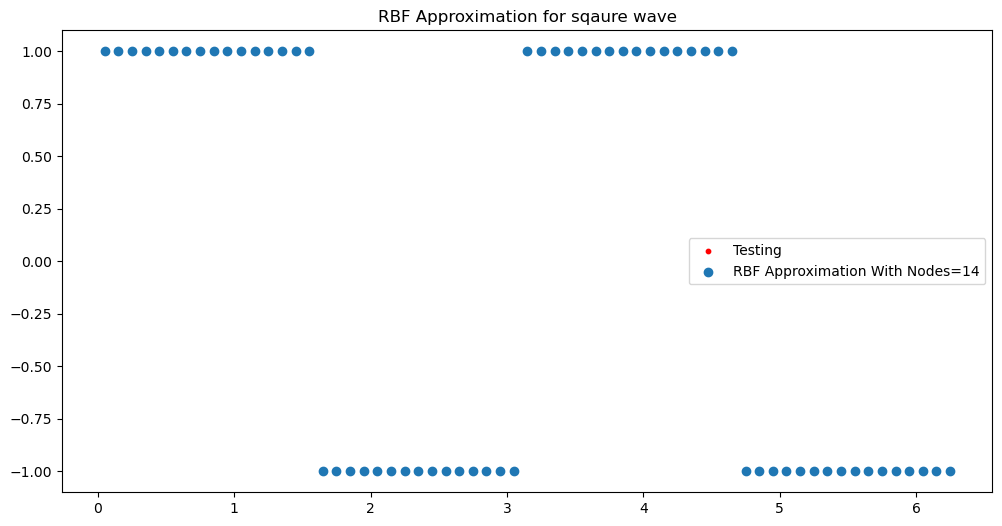

In [75]:
# Parameters
node_number = 14
sigma = 0.2
X_train = np.arange(0, 2*np.pi, 0.1)
square_Y_train = np.where(np.sin(2 * X_train) >= 0, 1, -1)
X_test = np.arange(0.05, 2 * np.pi, 0.1)
square_Y_test = np.where(np.sin(2 * X_test) >= 0, 1, -1)
square_rbf = RBFNN(node_number, sigma)
square_rbf.fit(X_train, square_Y_train)
Y_pred_square = square_rbf.predict(X_test)
Y_pred_square = np.where(square_rbf.predict(X_test) >= 0, 1, -1)
residual_error = np.abs(Y_pred_square - square_Y_test).mean()
print(residual_error)
plt.figure(figsize=(12, 6))
plt.scatter(X_test, square_Y_test, color='red', s=10, label="Testing")
plt.scatter(X_test, Y_pred_square, label=f"RBF Approximation With Nodes={node_number}")
plt.title(f"RBF Approximation for sqaure wave")
plt.legend()
plt.show()

# Regression with noise